## Notebook 4 : Trends and forecasts of property values 

## 1 - Introduction ##

Overview of the notebook’s objective and the data used.


this notebook will help identifying the past trends and foresee the evolution of the property values. We will base this analysis on historical data. Retrospective analysis : How did the prices evolve throughout time ? Can we target global  and seasonal trends ? What would be the prices in 3, 5 or 10 years ? Those insights can be more robust by linking them to geographical comparisons.

In [4]:
#### EXPLORING THE DATASET ####
import pandas as pd

# Read in the data
df_tf = pd.read_csv('df_complete.csv')

#df_tf.head()

/var/folders/sr/6t4rh27j1v1fr55gfr9fvsv40000gn/T/ipykernel_17273/1873396856.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tf = pd.read_csv('df_complete.csv')


In [5]:
df_clean = df_tf[
    (df_tf['Valeur fonciere'] > 0) & 
    (df_tf['Surface reelle bati'] > 0) &
    ((df_tf['Nombre pieces principales'] > 0) | (df_tf['Type local'] == 'Terrain'))
]

df_clean.describe()


,Valeur fonciere,Code postal,Code commune,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
count,6.180374e+06,6.180374e+06,6.180374e+06,6.180374e+06,6.180374e+06,6.180374e+06,6.180374e+06,6.180374e+06,6.180374e+06
mean,7.898712e+05,5.196389e+04,2.079455e+02,5.748702e-01,1.438426e+00,8.343096e+01,3.512798e+00,5.819976e+02,2.021344e+03
std,1.022298e+07,2.762136e+04,1.708908e+02,8.744794e-01,4.961942e-01,4.715455e+01,1.610626e+00,4.208792e+03,1.430034e+00
min,1.500000e-01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.019000e+03
25%,1.170000e+05,3.000000e+04,7.200000e+01,0.000000e+00,1.000000e+00,5.200000e+01,2.000000e+00,0.000000e+00,2.020000e+03
50%,1.900000e+05,5.400000e+04,1.680000e+02,0.000000e+00,1.000000e+00,7.600000e+01,3.000000e+00,1.910000e+02,2.021000e+03
75%,3.101500e+05,7.626000e+04,3.000000e+02,1.000000e+00,2.000000e+00,1.040000e+02,4.000000e+00,5.970000e+02,2.022000e+03
max,7.620000e+08,9.749000e+04,9.090000e+02,8.500000e+01,2.000000e+00,3.160000e+03,1.090000e+02,3.760000e+06,2.024000e+03


In [18]:
#### CONVERTS TO THE RIGHT TYPE ####

category_convert = ['Nature mutation', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Code commune', 'Code type local', 'Type local']
df_clean[category_convert] = df_clean[category_convert].astype('category')

df_clean['Date mutation'] = pd.to_datetime(df_clean['Date mutation'], errors = 'coerce')
df_clean['Date mutation'] = df_clean['Date mutation'].interpolate(method='linear')

df_clean['Valeur fonciere']=df_clean['Valeur fonciere'].replace({'\xa0':'',',':'.'}, regex=True)
df_clean['Valeur fonciere']=pd.to_numeric(df_clean['Valeur fonciere'], errors='coerce')

df_clean.info()

/var/folders/sr/6t4rh27j1v1fr55gfr9fvsv40000gn/T/ipykernel_17273/2400172058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[category_convert] = df_clean[category_convert].astype('category')
/var/folders/sr/6t4rh27j1v1fr55gfr9fvsv40000gn/T/ipykernel_17273/2400172058.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date mutation'] = pd.to_datetime(df_clean['Date mutation'], errors = 'coerce')
/var/folders/sr/6t4rh27j1v1fr55gfr9fvsv40000gn/T/ipykernel_17273/2400172058.py:7: SettingWit

<class 'pandas.core.frame.DataFrame'>
Index: 6180374 entries, 0 to 17810873
Data columns (total 16 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date mutation              datetime64[ns]
 1   Nature mutation            category      
 2   Valeur fonciere            float64       
 3   Voie                       category      
 4   Code postal                category      
 5   Commune                    category      
 6   Code departement           category      
 7   Code commune               category      
 8   Nombre de lots             int64         
 9   Code type local            category      
 10  Type local                 category      
 11  Surface reelle bati        float64       
 12  Nombre pieces principales  float64       
 13  Surface terrain            float64       
 14  annee                      int64         
 15  mois                       period[M]     
dtypes: category(8), datetime64[ns](1), float

In [13]:
#### CHECK MISSING VALUES ####
df_clean.isnull().sum()
# Comptage des zéros dans chaque colonne
(df_clean == 0).sum()


Date mutation                      0
Nature mutation                    0
Valeur fonciere                    0
Voie                               0
Code postal                      304
Commune                            0
Code departement                   0
Code commune                       0
Nombre de lots               3805414
Code type local                    0
Type local                         0
Surface reelle bati                0
Nombre pieces principales          0
Surface terrain              2405155
annee                              0
dtype: int64

In [14]:
#### CHECK DUPLICATES ####
#df_tf.drop_duplicates(keep='last', inplace=True)
df_clean.duplicated().sum()

0

In [9]:
df_clean.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07 00:00:00.000000000,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07 00:00:00.000000000,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
5,2019-03-07 00:00:00.000000000,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,1.0,Maison,110.0,5.0,2483.0,2019


## 2 - Methodology ##

Explanation of the analysis methods and visualizations.

Data Exploration:
- Analyze the evolution of property values over time (by year).
- Identify significant periods of increase or decrease in prices.

In [15]:
#### LIBRARIES ####
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

Nous avons ci-dessous un graphique qui trace l'evolution de la médiane et la moyenne des valeurs foncières de 2019 à 2024. 

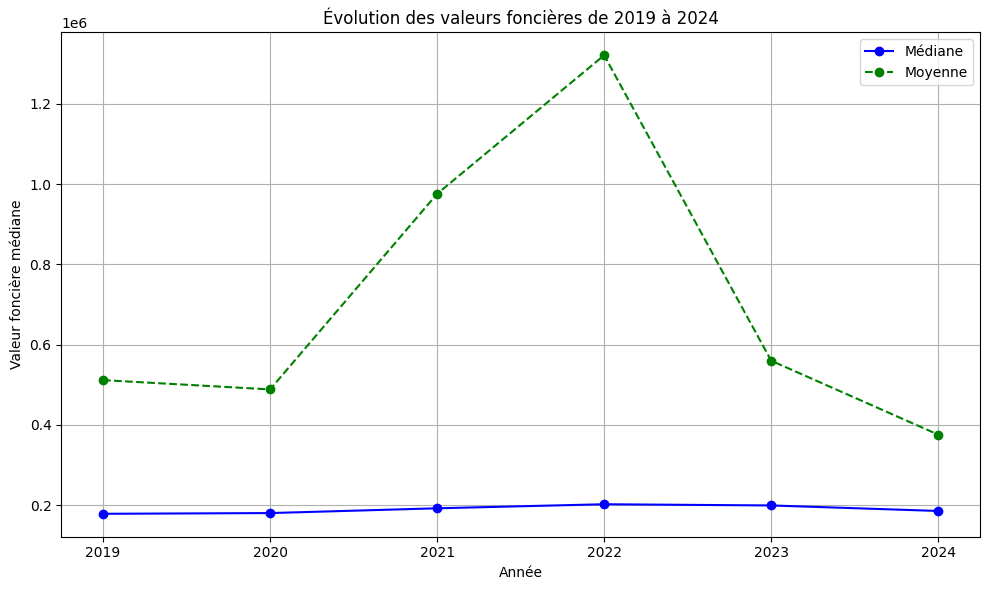

In [19]:
df_clean.loc[:, 'annee'] = pd.to_datetime(df_clean['Date mutation']).dt.year
df_clean.loc[:,'mois']=df_clean['Date mutation'].dt.to_period('M')
median_peryear=df_clean.groupby('annee')['Valeur fonciere'].median().reset_index()
mean_peryear=df_clean.groupby('annee')['Valeur fonciere'].mean().reset_index()

def plot_evolution_valeurs():
    plt.figure(figsize=(10, 6))
    plt.plot(median_peryear['annee'], median_peryear['Valeur fonciere'], marker='o', label='Médiane', color='blue')

    plt.plot(mean_peryear['annee'], mean_peryear['Valeur fonciere'], marker='o', label='Moyenne', color='green', linestyle='--')

    plt.title('Évolution des valeurs foncières de 2019 à 2024')
    plt.xlabel('Année')
    plt.ylabel('Valeur foncière médiane')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_evolution_valeurs()

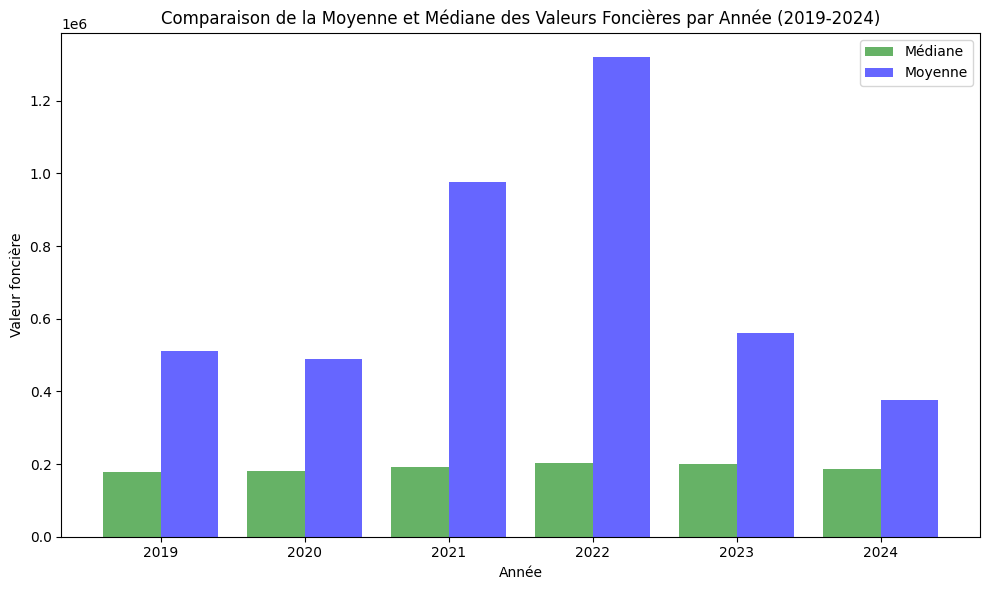

In [20]:
def plot_evolution_barchart(mean_peryear, median_peryear):
    plt.figure(figsize=(10, 6))

    x = mean_peryear['annee']
    offset = 0.2 
    plt.bar(x - offset, median_peryear['Valeur fonciere'], width=offset * 2, label='Médiane', color='green', alpha=0.6)
    plt.bar(x + offset, mean_peryear['Valeur fonciere'], width=offset * 2, label='Moyenne', color='blue', alpha=0.6)
    plt.title('Comparaison de la Moyenne et Médiane des Valeurs Foncières par Année (2019-2024)')
    plt.xlabel('Année')
    plt.ylabel('Valeur foncière')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_evolution_barchart(mean_peryear, median_peryear)



In [22]:
def interactive_plot(year=2019):
    filtered_year = df_clean[df_clean['annee'] == year]
    month_trends = filtered_year.groupby('mois')['Valeur fonciere'].median().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(month_trends['mois'].astype(str), month_trends['Valeur fonciere'], marker='o', label=f'Médiane {year}', c='red')
    plt.title(f'Évolution des valeurs foncières pour {year}')
    plt.xlabel('Mois')
    plt.ylabel('Valeur foncière médiane')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

interact(interactive_plot, year=widgets.IntSlider(value=2019, min=2019, max=2024, step=1))


interactive(children=(IntSlider(value=2019, description='year', max=2024, min=2019), Output()), _dom_classes=(…

<function __main__.interactive_plot(year=2019)>

## 3 - Results ##

Presentation of the analyses, visualizations, and findings.

Visualizations:
- Time series graphs showing property value trends over the years.
- Line charts comparing trends across different regions.

## 4 - Conlusion and recommandations ##

Summary of discoveries and investment advice.

Conclusions:
- Synthesize observed price trends over the past years.
- Identify external factors that could explain changes (e.g., economy, demographics, infrastructure).

Recommendations:
- Propose investment recommendations based on future price forecasts (e.g., investing in regions with predicted price growth).
- Risk management advice based on past and future property value trends.